# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from data_reading_stoplist_construction import read_data, build_stop_lists

# K-means

Elbow Method to find optimal number of clusters

In [2]:
# Step 1: Load data
sites, spots, shops, ecommerce_orders, o2o_orders, couriers = read_data()
ecommerce_stops, o2o_stop_pairs = build_stop_lists(sites, spots, shops, ecommerce_orders, o2o_orders)

# Step 2: Combine delivery stops
delivery_stops = ecommerce_stops + [pair[1] for pair in o2o_stop_pairs]
coords = [(stop.lat, stop.lng) for stop in delivery_stops]

# Step 3: Elbow Method
inertias = []
k_range = range(5, 30)  # try different values for k

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(coords)
    inertias.append(kmeans.inertia_)

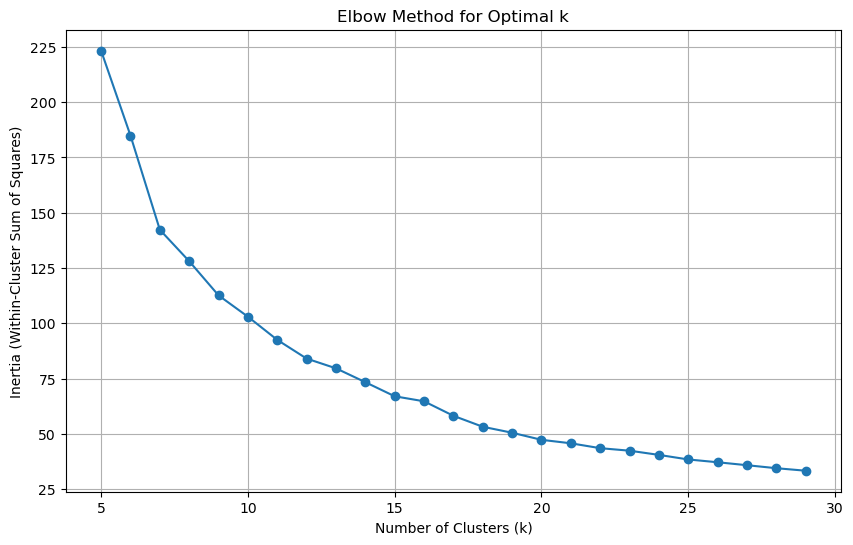

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

Silhouette Score

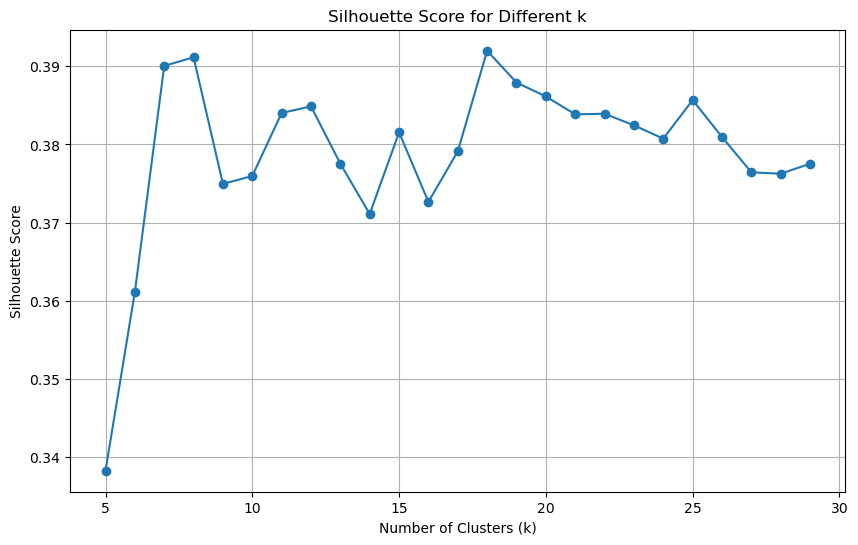

In [4]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(coords)
    sil_scores.append(silhouette_score(coords, labels))

plt.figure(figsize=(10, 6))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.grid(True)
plt.show()
